In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
cd /content/gdrive/My Drive/'Data Analytics jcomp'

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('HOTEL_REVIEWS.csv')
data = data[data['Sentiment'] != 2]
print(data.shape)
data.head()

(1289, 2)


,Review_Text,Sentiment
0,Its really nice place to stay especially for b...,3
1,It seems that hotel does not check the basic a...,1
2,Worst hotel I have ever encountered. I will ne...,1
3,Had a good time in this hotel and the staff Ku...,3
4,good hotel and staff Veg food good non veg bre...,3


In [ ]:
data['Sentiment'].value_counts()

3    1158
1     131
Name: Sentiment, dtype: int64

In [ ]:
sentiment_label = data.Sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 0, 1]), Int64Index([3, 1], dtype='int64'))

In [ ]:
review = data.Review_Text.values
review

array(['Its really nice place to stay especially for business and tourist purpose.',
       'It seems that hotel does not check the basic amenities in the room, before handing over the room to the traveller. The phone in my room was not working and it created a problem for me, as after a hectic day of travel you would like to relax and work at your own pace. So they sent the technician who kept on looking for the fix for about an hour and then i had to get my room changed.',
       'Worst hotel I have ever encountered. I will never think to stay in thiis hotel in the future',
       ..., 'Its was awesome place to stay.',
       'Nice place for business travellers.. Very friendly staff',
       "Too many Mosquitoes, late check in, warm room, fridge not working, no light over vanity mirror, bed too soft, disturbed at the middle of the night by a errand boy, dirty swimming pool, curtains don't cover the full windows, balcony chairs uncomfortable, no information about complimentary tea, br

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(review)

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(review)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
e = Embedding(4000, 32, input_length=200)
model.add(e)
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           128000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 144,651
Trainable params: 144,651
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
33/33 [==============================] - 21s 512ms/step - loss: 0.3357 - accuracy: 0.9176 - val_loss: 0.5053 - val_accuracy: 0.8217
Epoch 2/10
33/33 [==============================] - 8s 247ms/step - loss: 0.2722 - accuracy: 0.9176 - val_loss: 0.5409 - val_accuracy: 0.8217
Epoch 3/10
33/33 [==============================] - 9s 267ms/step - loss: 0.2335 - accuracy: 0.9166 - val_loss: 0.9687 - val_accuracy: 0.8217
Epoch 4/10
33/33 [==============================] - 8s 243ms/step - loss: 0.1765 - accuracy: 0.9176 - val_loss: 0.8414 - val_accuracy: 0.8217
Epoch 5/10
33/33 [==============================] - 8s 245ms/step - loss: 0.1299 - accuracy: 0.9447 - val_loss: 1.1364 - val_accuracy: 0.8217
Epoch 6/10
33/33 [==============================] - 8s 245ms/step - loss: 0.1558 - accuracy: 0.9408 - val_loss: 1.3206 - val_accuracy: 0.8217
Epoch 7/10
33/33 [==============================] - 8s 242ms/step - loss: 0.1351 - accuracy: 0.9447 - val_loss: 1.2560 - val_accuracy: 0.8256
Epoch

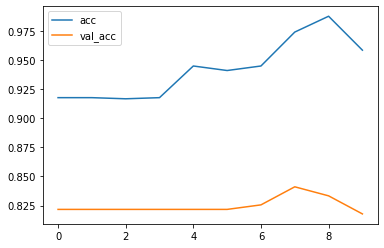

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
# plt.savefig("Accuracy plot.jpg")

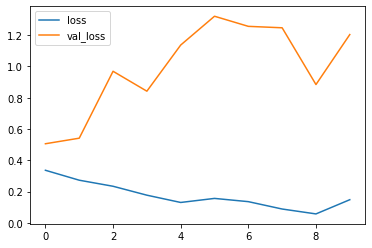

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
# plt.savefig("Loss plt.jpg")

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

test_sentence1 = "enjoyed this hotel"
predict_sentiment(test_sentence1)

1/1 [==============================] - 0s 302ms/step
Predicted label:  3


In [ ]:
test_sentence2 = "Worst hotel I have ever encountered"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 35ms/step
Predicted label:  1


In [ ]:
test_sentence1 = "loved this hotel"
predict_sentiment(test_sentence1)

1/1 [==============================] - 0s 36ms/step
Predicted label:  3
